In [1]:
fn = "bd29d2091_mod_002.fits"


In [2]:
import os
if not os.path.exists(fn):
    from urllib.request import urlopen
    url = f'https://ssb.stsci.edu/cdbs/current_calspec/{fn}'
    with urlopen(url) as response:
        r = response.read()

    open(fn, "bw").write(r)


In [3]:
import astropy.io.fits as pyfits

f1 = pyfits.open(fn)
d = f1[1].data
wvl0, flux0 = d['WAVELENGTH']*1.e-4, d['FLUX']
flux_nu0 = flux0*wvl0*wvl0  # unit need to be fixed.


In [4]:
import matplotlib.pyplot as plt


In [5]:
%matplotlib inline


In [6]:
from SPHEREx_InstrumentSimulator import smile_lvf

# lw0, lt_ = smile_lvf(1024, 1024, array=1, central_bandpass_only=True)
lw1, lt1 = smile_lvf(1024, 1024, array=1)
lw2, lt2 = smile_lvf(1024, 1025, array=1)


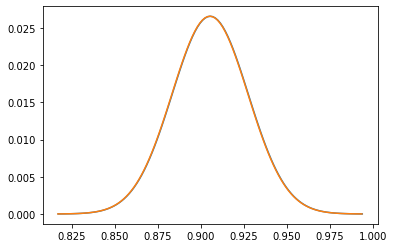

In [7]:
fig, ax = plt.subplots()
ax.plot(lw1, lt1, "-")
ax.plot(lw2, lt2, "-")


In [8]:
i1, i2 = wvl0.searchsorted([lw1[0]-0.01, lw1[-1]+0.01])
sl = slice(i1, i2)
wvl, flux_nu = wvl0[sl], flux_nu0[sl]


In [9]:
# simple interpolation

from scipy.interpolate import interp1d
intp = interp1d(wvl, flux_nu)

simple_interpolation1 = intp(lw1)
simple_interpolation2 = intp(lw2)


In [10]:
# rebin by integrating the interpolant

from rebin1d import AccumulatedInterpNN

intp_nn = AccumulatedInterpNN(wvl, flux_nu)

lw1c = 0.5*(lw1[1:] + lw1[:-1])
dw1 = lw1[1:] - lw1[:-1]

lw2c = 0.5*(lw2[1:] + lw2[:-1])
dw2 = lw2[1:] - lw2[:-1]

rebinned1 = intp_nn.rebin(lw1) / dw1
rebinned2 = intp_nn.rebin(lw2) / dw2


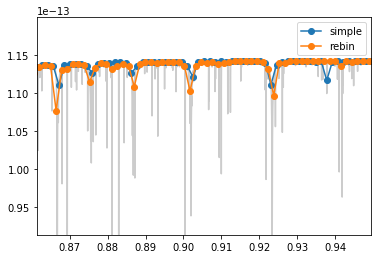

In [12]:
# comparison of simple interpolation vs rebin
fig, ax1 = plt.subplots()
flux_nu_max = flux_nu.max()
ax1.plot(wvl, flux_nu, "-", color="0.8")
l1, = ax1.plot(lw1, simple_interpolation1, "o-")
l2, = ax1.plot(lw1c, rebinned1, "o-")
ax1.set_ylim(0.8 * flux_nu_max, 1.05 * flux_nu_max)
ax1.set_xlim(lw1[30], lw1[90])
ax1.legend([l1, l2], ["simple", "rebin"])


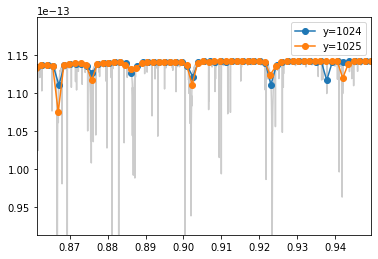

In [13]:
# simple interpolation is sensitive to the interpolating points.

fig, ax1 = plt.subplots()
flux_nu_max = flux_nu.max()
ax1.plot(wvl, flux_nu, "-", color="0.8")
l1, = ax1.plot(lw1, simple_interpolation1, "o-")
l2, = ax1.plot(lw2, simple_interpolation2, "o-")
ax1.set_ylim(0.8 * flux_nu_max, 1.05 * flux_nu_max)
ax1.set_xlim(lw1[30], lw1[90])
ax1.legend([l1, l2], ["y=1024", "y=1025"])



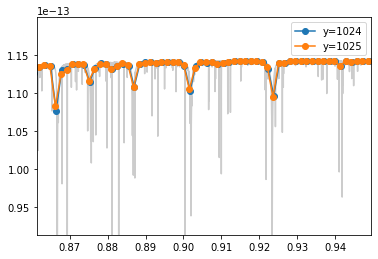

In [14]:
# rebin based on integration is not.

fig, ax1 = plt.subplots()
flux_nu_max = flux_nu.max()
ax1.plot(wvl, flux_nu, "-", color="0.8")
l1, = ax1.plot(lw1c, rebinned1, "o-")
l2, = ax1.plot(lw2c, rebinned2, "o-")
ax1.set_ylim(0.8 * flux_nu_max, 1.05 * flux_nu_max)
ax1.set_xlim(lw1[30], lw1[90])
ax1.legend([l1, l2], ["y=1024", "y=1025"])
